In [10]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import matplotlib.font_manager
from scipy.interpolate import make_interp_spline

In [2]:
path_dataset = 'C:/Users/Teclast/Documents/Papers/Deep Learning in Artworks/Database/Labels/Classification_Labels.xlsx'
path_emo_dataset = 'C:/Users/Teclast/Documents/Papers/Deep Learning in Artworks/Database/Labels/Sentiment_labels.xlsx'

In [3]:
class_dataset = pd.read_excel(path_dataset, engine = 'openpyxl')
emo_dataset = pd.read_excel(path_emo_dataset, engine = 'openpyxl')

In [18]:
class_dataset.head(2)

,Artist_Name,Painting_Name,Art_Genre,Art Nouveau,Baroque,Cubism,Impressionism,Italian Renaissance,Mannerism-Late Renaissance,Northern Renaissance,Pop Art,Post-Impressionism,Realism,Rococo,Romanticism,Street Art,Surrealism
0,Achille Beltrame,22-agosto-1915,Art Nouveau,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Achille Beltrame,a-moment-s-rest-beltrame,Art Nouveau,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
art_class = class_dataset.Art_Genre.unique()
art_class

array(['Art Nouveau', 'Baroque', 'Cubism', 'Impressionism',
       'Italian Renaissance', 'Mannerism-Late Renaissance',
       'Northern Renaissance', 'Pop Art', 'Post-Impressionism', 'Realism',
       'Rococo', 'Romanticism', 'Street Art', 'Surrealism'], dtype=object)

In [6]:
for i in range(0, len(art_class)):
    df_class = class_dataset.loc[class_dataset['Art_Genre'] == art_class[i]]
    list_painter = df_class.Artist_Name.unique()
    print(len(list_painter))

38
37
88
29
50
46
47
70
30
22
59
47
47
72


In [22]:
emo_dataset.head(2)

,Artist_Name,File_Name,Art_Class,Emotion_Group_1,Emotion_Group_2,Emotion_Group_3
0,Alphonse Maria Mucha,alphonse-mucha_6th-sokol-festival-1912,Art Nouveau,Disgust,Sadness,Surprise
1,Alphonse Maria Mucha,alphonse-mucha_8th-sokol-festival-1912,Art Nouveau,Joy,Sadness,Joy


In [8]:
emo_class = emo_dataset.Emotion_Group_3.unique()
print('emo_class:', emo_class)

emo_list = [emo_class[1], emo_class[2], emo_class[5], emo_class[0], emo_class[3], emo_class[4]]
print('emo_list:', emo_list)

emo_class: ['Surprise' 'Joy' 'Sadness' 'Anger' 'Fear' 'Disgust']
emo_list: ['Joy', 'Sadness', 'Disgust', 'Surprise', 'Anger', 'Fear']


In [20]:
path_save = 'C:/Users/Teclast/Documents/Papers/Deep Learning in Artworks/Writing/emotion percentages per class/'
fig = plt.figure()

for i in range(0, len(art_class)):
    list_perc = []
    y = []
    df_class = emo_dataset.loc[emo_dataset['Art_Class'] == art_class[i]]
    total_count_emo = len(df_class)
    for k in range(0, len(emo_list)):     
        df_emo_class = df_class.loc[df_class['Emotion_Group_3'] == emo_list[k]]
        perc_emo =  len(df_emo_class)/total_count_emo
        perc_emo =  perc_emo * 100
        perc_emo =  round(perc_emo,2)
        print(art_class[i],';', emo_list[k],';',perc_emo)
        list_perc.append(perc_emo)
    print(art_class[i],';','Total',';',total_count_emo)
    y = np.array(list_perc)
    mylabels = list_perc
    mycolors = ["blue", "orange", "gray", "yellow", "green", "red"]
    plt.pie(y, labels = mylabels, colors = mycolors)
    plt.rcParams['font.family'] = 'DeJavu Serif'
    plt.rcParams['font.serif'] = ['Times New Roman']
    path_save_fig = path_save + art_class[i] + '_3' + '.png'
    fig.savefig(path_save_fig, dpi = 150)
    plt.clf()

Art Nouveau ; Joy ; 41.37
Art Nouveau ; Sadness ; 19.91
Art Nouveau ; Disgust ; 5.3
Art Nouveau ; Surprise ; 17.44
Art Nouveau ; Anger ; 9.22
Art Nouveau ; Fear ; 6.76
Art Nouveau ; Total ; 1095
Baroque ; Joy ; 17.61
Baroque ; Sadness ; 44.43
Baroque ; Disgust ; 1.82
Baroque ; Surprise ; 28.28
Baroque ; Anger ; 3.28
Baroque ; Fear ; 4.56
Baroque ; Total ; 1096
Cubism ; Joy ; 8.65
Cubism ; Sadness ; 10.47
Cubism ; Disgust ; 1.37
Cubism ; Surprise ; 77.14
Cubism ; Anger ; 1.0
Cubism ; Fear ; 1.37
Cubism ; Total ; 1098
Impressionism ; Joy ; 65.99
Impressionism ; Sadness ; 15.63
Impressionism ; Disgust ; 0.36
Impressionism ; Surprise ; 16.52
Impressionism ; Anger ; 1.07
Impressionism ; Fear ; 0.44
Impressionism ; Total ; 1126
Italian Renaissance ; Joy ; 11.54
Italian Renaissance ; Sadness ; 35.26
Italian Renaissance ; Disgust ; 2.75
Italian Renaissance ; Surprise ; 42.49
Italian Renaissance ; Anger ; 3.21
Italian Renaissance ; Fear ; 4.76
Italian Renaissance ; Total ; 1092
Mannerism-Late R

<Figure size 432x288 with 0 Axes>

# statistics of classification dataset

In [2]:
path_class = 'C:/Users/Teclast/Documents/Papers/Deep Learning in Artworks/Database/Labels/Classification_Labels.xlsx'

class_dataset = pd.read_excel(path_class, engine = 'openpyxl')

class_dataset.head(2)

,Artist_Name,Painting_Name,Art_Genre,Art Nouveau,Baroque,Impressionism,Italian Renaissance,Post-Impressionism,Realism,Rococo,Romanticism,Street Art,Surrealism
0,Achille Beltrame,22-agosto-1915,Art Nouveau,1,0,0,0,0,0,0,0,0,0
1,Achille Beltrame,a-moment-s-rest-beltrame,Art Nouveau,1,0,0,0,0,0,0,0,0,0


In [3]:
list_class = class_dataset.Art_Genre.unique()
list_class

array(['Art Nouveau', 'Baroque', 'Impressionism', 'Italian Renaissance',
       'Post-Impressionism', 'Realism', 'Rococo', 'Romanticism',
       'Street Art', 'Surrealism'], dtype=object)

In [6]:
for i in range(0,len(list_class)):
    df_temp = class_dataset.loc[class_dataset['Art_Genre'] == list_class[i]]
    print(list_class[i], len(df_temp))

print('Total:', len(class_dataset))

Art Nouveau 4603
Baroque 4462
Impressionism 4086
Italian Renaissance 3982
Post-Impressionism 4600
Realism 4293
Rococo 3805
Romanticism 4349
Street Art 4133
Surrealism 4651
Total: 42964


# construction of model accuracy and loss diagram

In [45]:
epoch_list = []

for i in range(1,31):
    epoch_list.append(i)

In [61]:
y_plot_acc = [0.3477422297000885, 0.4542461931705475, 0.5115382075309753, 0.5483474135398865, 0.5831947922706604, 0.625357449054718, 0.6644942760467529, 0.7128416299819946, 0.7555363178253174, 0.7908160090446472, 0.8244662880897522, 0.8494380712509155, 0.8705193996429443, 0.8889738917350769, 0.9071291089057922, 0.9192658066749573, 0.928010880947113, 0.9341956377029419, 0.9426082372665405, 0.9450688362121582, 0.9515196084976196, 0.9540799260139465, 0.9577375650405884, 0.9601317048072815, 0.9622265100479126, 0.966249942779541, 0.967047929763794, 0.9699075818061829, 0.9684445261955261, 0.9718028903007507]
y_plot_acc = [round(num, 2) for num in y_plot_acc]

y_plot_val_acc = [0.3068777024745941, 0.3449319303035736, 0.464680552482605, 0.3689049184322357, 0.48702430725097656, 0.37414175271987915, 0.4970324635505676, 0.46642616391181946, 0.5002909302711487, 0.49121376872062683, 0.4967997074127197, 0.44664260745048523, 0.5269405245780945, 0.4898172914981842, 0.518561601638794, 0.5274060368537903, 0.4859769642353058, 0.5464913249015808, 0.49237751960754395, 0.5261259078979492, 0.5291516184806824, 0.5221692323684692, 0.5491679310798645, 0.49889445304870605, 0.5343884825706482, 0.5106481909751892, 0.4777144193649292, 0.49284300208091736, 0.5304317474365234, 0.5574304461479187]
y_plot_val_acc = [round(num, 2) for num in y_plot_val_acc]

In [62]:
x_plot = np.array(epoch_list)

y_plot_acc = np.array(y_plot_acc)
y_plot_val_acc = np.array(y_plot_val_acc)

X_Y_Spline_acc = make_interp_spline(x_plot, y_plot_acc)
X_Y_Spline_val_acc = make_interp_spline(x_plot, y_plot_val_acc)


# Returns evenly spaced numbers
# over a specified interval.

X_plot = np.linspace(x_plot.min(), x_plot.max())
y_plot_acc = X_Y_Spline_acc(X_plot)
y_plot_val_acc = X_Y_Spline_val_acc(X_plot)

<function matplotlib.pyplot.show(close=None, block=None)>

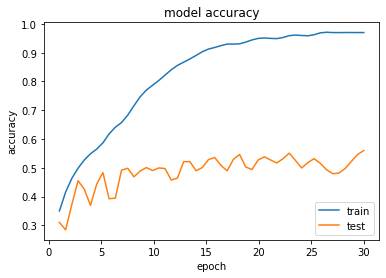

In [69]:
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.plot(X_plot, y_plot_acc)
plt.plot(X_plot, y_plot_val_acc)
plt.legend(["train", "test"], loc="lower right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

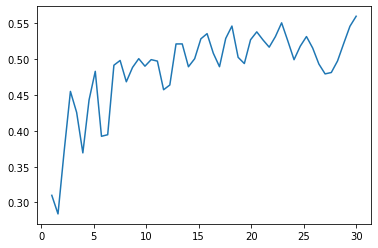